# Global Mean Surface Temperature from Control Runs
* Wenchang Yang (wenchang@princeton.edu)
* Department of Geosciences, Princeton University

In [17]:
%matplotlib notebook
!date

import datetime
import numpy as np
import matplotlib.pyplot as plt
# plt.rcParams['hatch.color']='g'
import xarray as xr
from scipy.stats import ttest_1samp

from plotsetting import *
from geoplots import mapplot, xticksyear, xticksmonth
import geoxarray

Tue Mar 20 16:36:43 EDT 2018


## Data

In [18]:
data_name = 't_surf'
nclist = [
    {'tag': 'Control_1860', 
    'ncfile': '/tigress/wenchang/MODEL_OUT/PIctl_CMIP6volc/POSTP/0???0101.atmos_month.nc'
    },
    {'tag': 'Control_1860_CMIP6Volc', 
    'ncfile': '/tigress/wenchang/MODEL_OUT/Control_1860_CMIP6Volc/POSTP/0???0101.atmos_month.nc'
    },
    {'tag': 'Control_1990',
    'ncfile': '/tigress/gvecchi/MODEL_OUT/Control-1990_tigerx86_64.intel16_512PE/POSTP/0???0101.atmos_month.nc'
    },
    {'tag': 'Control_2000',
    'ncfile': '/tigress/wenchang/MODEL_OUT/Control_2000/POSTP/0???0101.atmos_month.nc'
    },
]

dss = dict()# key is tag, value is xr.Dataset
for nc in nclist:
    tag = nc['tag']
    ncfile = nc['ncfile']
    ds = xr.open_mfdataset(ncfile).rename({'grid_xt': 'lon', 'grid_yt':'lat'})
    ds['time'] = [datetime.datetime(*t.replace(year=t.year+2000).timetuple()[0:6]) for t in ds['time'].values]
    dss[tag] = ds

/tigress/wenchang/miniconda3/envs/intel/lib/python3.6/site-packages/xarray/conventions.py:416: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  result = decode_cf_datetime(example_value, units, calendar)
/tigress/wenchang/miniconda3/envs/intel/lib/python3.6/site-packages/xarray/conventions.py:435: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  calendar=self.calendar)


## Global-mean ``t_surf``

In [3]:
tss = dict() # key is tag, value is xr.DataArray
for tag,ds in dss.items():
    ts = ds[data_name].geo.fldmean().load()
    tss[tag] = ts

<IPython.core.display.Javascript object>


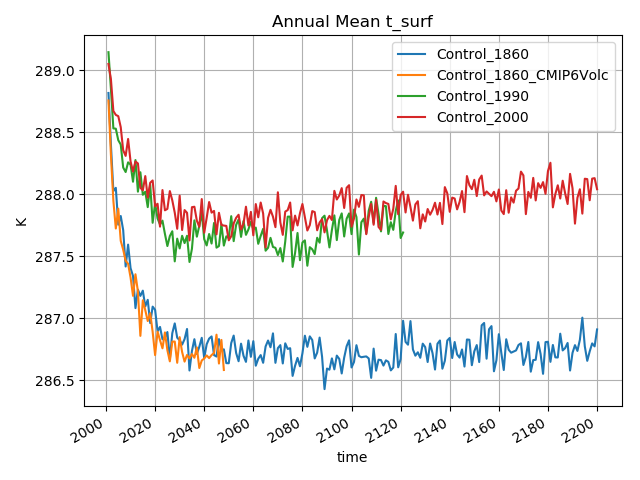

In [4]:
for nc in nclist:
    tag = nc['tag']
    ts = tss[tag]
    ts.resample(time='AS').mean('time').plot(label=tag)
plt.legend(frameon=True)
plt.grid(True)
plt.title('Annual Mean t_surf')
plt.ylabel('K')
xticksyear(20)
plt.tight_layout()

In [19]:
years_clim = slice('2151', '2180') # years used for estimating climatology

## Year 151-180 climatology and change from 1860 to 2000

### ``t_surf``

In [24]:
data_name = 't_surf'
da = dss['Control_1860'][data_name].sel(time=years_clim).groupby('time.season').mean('time').load()
daa = dss['Control_2000'][data_name].sel(time=years_clim).groupby('time.season').mean('time').load() - da

<IPython.core.display.Javascript object>


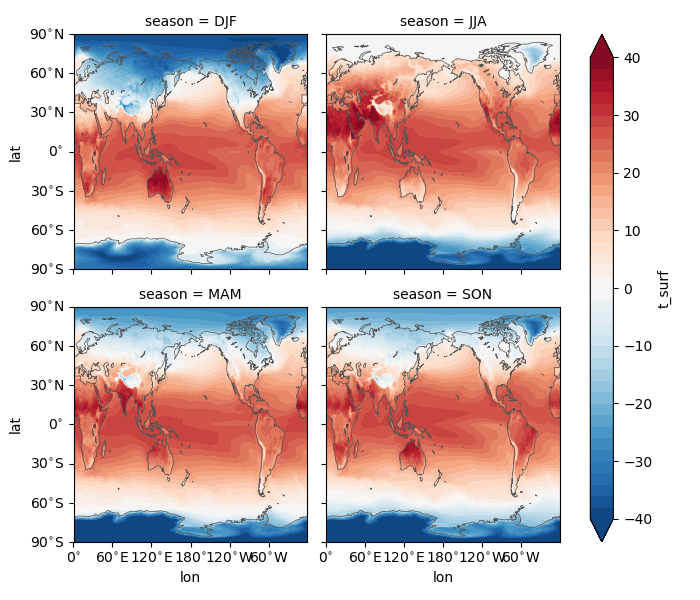

In [25]:
f = da.pipe(lambda x:x-273.15).plot.contourf(col='season', col_wrap=2, robust=True, 
                                             levels=range(-40, 41, 2))
for ii, ax in enumerate(f.axes.flat):
    mapplot(ax=ax, coastlines_width=0.5)

<IPython.core.display.Javascript object>


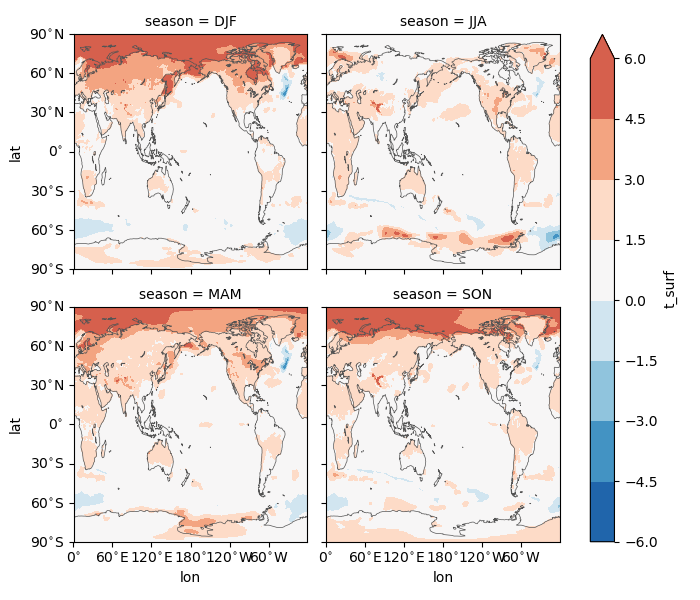

In [30]:
# change from 1850 to 2000
f = daa.plot.contourf(col='season', col_wrap=2, robust=True,cmap='RdBu_r', levels=10)
for ii, ax in enumerate(f.axes.flat):
    mapplot(ax=ax, coastlines_width=0.5)

In [31]:
data_name = 'precip'
da = dss['Control_1860'][data_name].sel(time=years_clim).groupby('time.season').mean('time').load()
daa = dss['Control_2000'][data_name].sel(time=years_clim).groupby('time.season').mean('time').load() - da

<IPython.core.display.Javascript object>


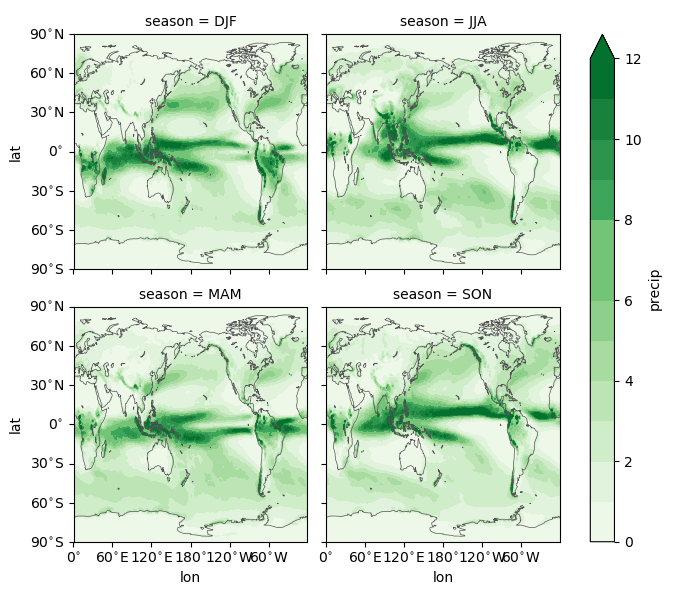

In [37]:
f = da.pipe(lambda x:x*24*3600).plot.contourf(col='season', col_wrap=2, robust=True,
                                             cmap='Greens', levels=range(0,13))
for ii, ax in enumerate(f.axes.flat):
    mapplot(ax=ax, coastlines_width=0.5)

<IPython.core.display.Javascript object>


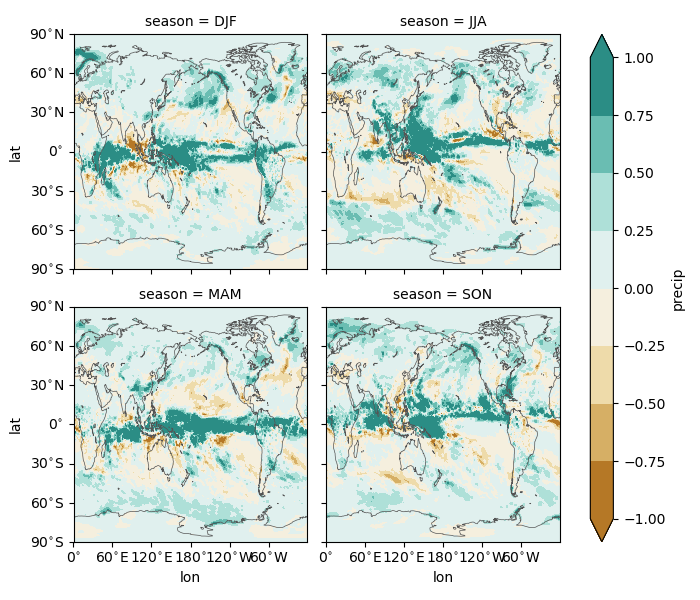

In [38]:
# change from 1860 to 2000
f = daa.pipe(lambda x:x*24*3600).plot.contourf(col='season', col_wrap=2, robust=True,
                                               cmap='BrBG', levels=10)
for ii, ax in enumerate(f.axes.flat):
    mapplot(ax=ax, coastlines_width=0.5)